In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


# Specify directories 
data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data"
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"
temp_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/temp"

df = pd.read_stata(f"{temp_dir}/ee_rates_by_education.dta")

C:\Users\singhy\AppData\Local\Temp\ipykernel_26380\457678044.py:15: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df.resample('Q').mean()


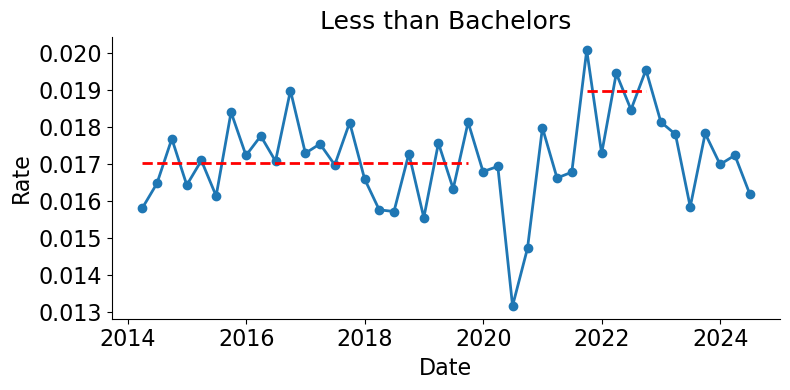

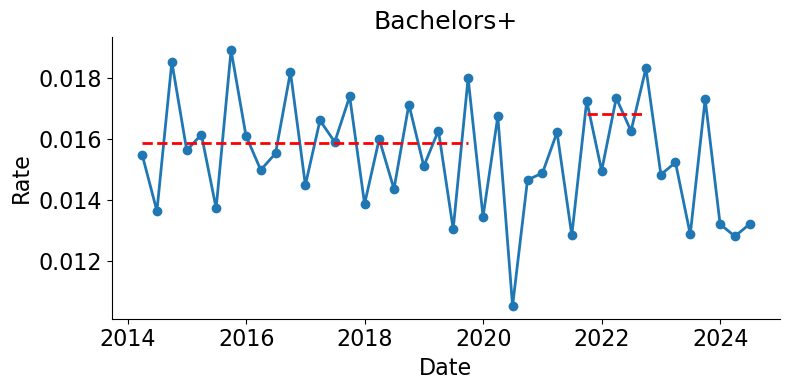

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is already called 'df'

# Define periods
df['inf_period'] = ((df['Date'] >= '2021-09-01') & (df['Date'] <= '2022-12-01')).astype(int)
df['pre_period'] = (df['Date'] <= '2019-12-01').astype(int)

# Set Date as index for resampling
df = df.set_index('Date')

# Resample to quarterly averages (calendar quarter)
df_quarterly = df.resample('Q').mean()

# Define new period indicators on quarterly data
df_quarterly['inf_period'] = ((df_quarterly.index >= '2021-09-01') & (df_quarterly.index <= '2022-12-01')).astype(int)
df_quarterly['pre_period'] = (df_quarterly.index <= '2019-12-01').astype(int)

# Define date ranges
pre_dates = df_quarterly.loc[df_quarterly['pre_period'] == 1].index
inf_dates = df_quarterly.loc[df_quarterly['inf_period'] == 1].index

# Compute quarterly averages
avg_ee1_pre = df_quarterly.loc[df_quarterly['pre_period'] == 1, 'ee_educ_1'].mean()
avg_ee1_inf = df_quarterly.loc[df_quarterly['inf_period'] == 1, 'ee_educ_1'].mean()

avg_ee2_pre = df_quarterly.loc[df_quarterly['pre_period'] == 1, 'ee_educ_2'].mean()
avg_ee2_inf = df_quarterly.loc[df_quarterly['inf_period'] == 1, 'ee_educ_2'].mean()

# Plot for ee_educ_1 (quarterly averaged)
plt.figure(figsize=(8, 4))
plt.plot(df_quarterly.index, df_quarterly['ee_educ_1'], marker='o', linewidth=2)
plt.hlines(avg_ee1_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
plt.hlines(avg_ee1_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Less than Bachelors', fontsize=18)
plt.ylabel('Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.tight_layout()
plt.show()

# Plot for ee_educ_2 (quarterly averaged)
plt.figure(figsize=(8, 4))
plt.plot(df_quarterly.index, df_quarterly['ee_educ_2'], marker='o', linewidth=2)
plt.hlines(avg_ee2_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
plt.hlines(avg_ee2_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Bachelors+', fontsize=18)
plt.ylabel('Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.tight_layout()
plt.show()
